# Initial points for GRB

*Using a similar code to what I did [here](https://github.com/ageller/LIGONSWebGL)*

In [11]:
import numpy as np
from mpl_toolkits.mplot3d import axes3d    
import matplotlib.pyplot as plt

from matplotlib import animation
from IPython.display import HTML

%matplotlib notebook

In [12]:
NGRBp = 100
Ndiv = 100
GRBpsize = 0.05
GRBspread = 0.02
GRBspeed = 3.

GRBparts = []


for i in range(Ndiv):
    for j in range(NGRBp):
        tt = 2.*np.pi*np.random.random()
        ttv = 2.*np.pi*np.random.random()
        rr = GRBpsize*np.random.random()
        rrv = GRBspread*np.random.random()
        

        front = [rr*np.cos(tt) + i/Ndiv*rrv*np.cos(tt), \
                 rr*np.sin(tt) + i/Ndiv*rrv*np.sin(tt), \
                 i/Ndiv*GRBspeed,\
                 rrv*np.cos(tt), \
                 rrv*np.sin(tt), \
                 GRBspeed, 7., 8., 9.]   #x, y, z, vx, vy, vz, filler for raw rile
        GRBparts.append(front);
        GRBparts.append([-1.*x for x in front]); #back


<IPython.core.display.Javascript object>


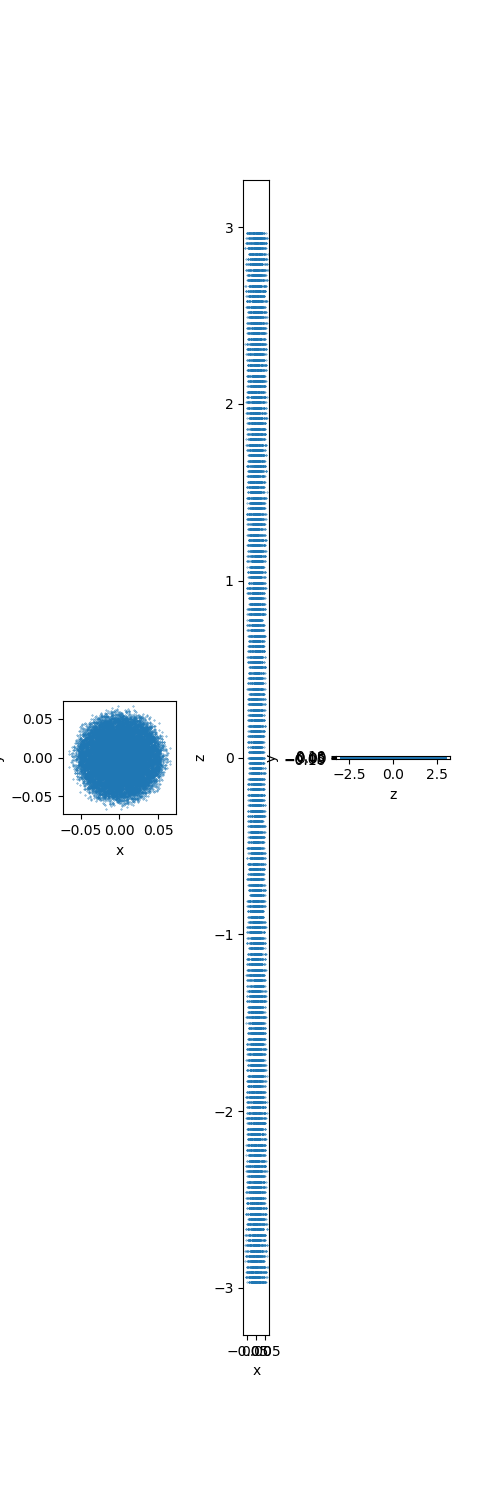

In [13]:
x = [val[0] for val in GRBparts]
y = [val[1] for val in GRBparts]
z = [val[2] for val in GRBparts]

s = 0.1
f,ax = plt.subplots(1,3, figsize=(5, 15))
ax[0].scatter(x,y,s)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

ax[1].scatter(x,z,s)
ax[1].set_xlabel('x')
ax[1].set_ylabel('z')

ax[2].scatter(z,y,s)
ax[2].set_xlabel('z')
ax[2].set_ylabel('y')

for a in ax:
    a.set_aspect('equal')
    
    


<IPython.core.display.Javascript object>


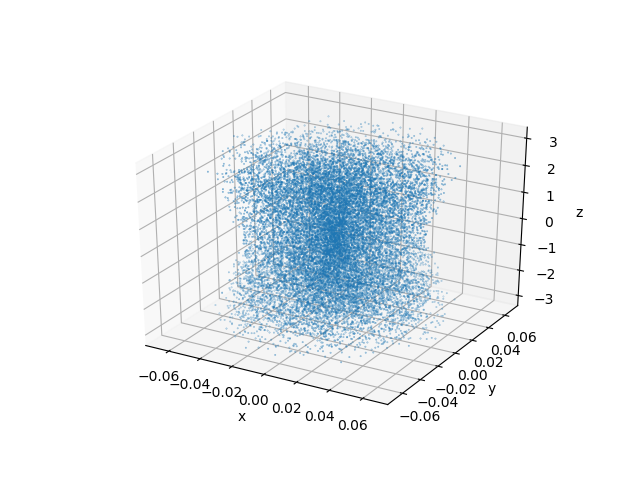

Text(0.5,0,'z')

In [14]:
s = 0.1
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z,s=s)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


### Write this to a "raw" file for Unviview

In [15]:
import csv
csvfile = open("GRB.raw", 'wt')
csvwriter = csv.writer(csvfile, delimiter=' ', quotechar='|', quoting=csv.QUOTE_MINIMAL)
for x in GRBparts:
    csvwriter.writerow(x)
csvfile.close()